Explore probability distributions

## Introduction

The ability to determine which type of probability distribution best fits data, calculate z-score, and detect outliers are essential skills in data work. These capabilities enable data professionals to understand how their data is distributed and identify data points that need further examination.

In this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of your main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, you will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [16]:
#use dropna() to remove missing values in your data.

air = pd.read_csv('/Users/oluwa/Documents/DATA ANALYSIS/DATA PROJECTS/air.csv')
air = air.dropna()

## 2. quick view of data

In [17]:
air.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294


In [18]:
air.tail()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
254,2018-01-01,Arizona,Pima,Tucson,CHERRY & GLENN,Carbon monoxide,Parts per million,2.708050
255,2018-01-01,District Of Columbia,District of Columbia,Washington,Near Road,Carbon monoxide,Parts per million,1.386294
256,2018-01-01,Wisconsin,Dodge,Kekoskee,HORICON WILDLIFE AREA,Carbon monoxide,Parts per million,1.098612
257,2018-01-01,Kentucky,Jefferson,Louisville,CANNONS LANE,Carbon monoxide,Parts per million,1.098612
259,2018-01-01,North Carolina,Wake,Not in a city,Triple Oak,Carbon monoxide,Parts per million,1.098612


In [19]:
air.columns

Index(['date_local', 'state_name', 'county_name', 'city_name',
       'local_site_name', 'parameter_name', 'units_of_measure', 'aqi_log'],
      dtype='object')

In [20]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 0 to 259
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_local        257 non-null    object 
 1   state_name        257 non-null    object 
 2   county_name       257 non-null    object 
 3   city_name         257 non-null    object 
 4   local_site_name   257 non-null    object 
 5   parameter_name    257 non-null    object 
 6   units_of_measure  257 non-null    object 
 7   aqi_log           257 non-null    float64
dtypes: float64(1), object(7)
memory usage: 18.1+ KB


In [21]:
air.describe

<bound method NDFrame.describe of      date_local            state_name           county_name      city_name  \
0    2018-01-01               Arizona              Maricopa        Buckeye   
1    2018-01-01                  Ohio               Belmont      Shadyside   
2    2018-01-01               Wyoming                 Teton  Not in a city   
3    2018-01-01          Pennsylvania          Philadelphia   Philadelphia   
4    2018-01-01                  Iowa                  Polk     Des Moines   
..          ...                   ...                   ...            ...   
254  2018-01-01               Arizona                  Pima         Tucson   
255  2018-01-01  District Of Columbia  District of Columbia     Washington   
256  2018-01-01             Wisconsin                 Dodge       Kekoskee   
257  2018-01-01              Kentucky             Jefferson     Louisville   
259  2018-01-01        North Carolina                  Wake  Not in a city   

                             

In [22]:
air.shape

(257, 8)

## 3. Plot histogram

<Axes: >

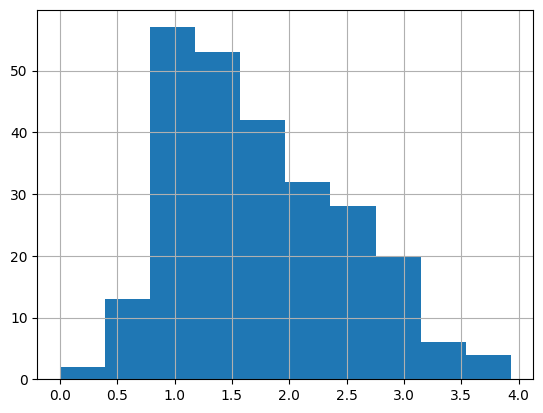

In [23]:
air['aqi_log'].hist()

The mean Aqi log, which is around 1%, is located in the left of the plot. 

## emperical rule/statistical tests

In [24]:
# define vairable for aqi_log mean
mean_aqi = air["aqi_log"].mean()
mean_aqi

1.7689182585091165

In [25]:
# define variable for aqi_log Standard deviation
std_aqi = air["aqi_log"].std()
std_aqi

0.7164977499700741

In [26]:
# define variable for lower limit, 1 SD below the mean.

lower_limit = mean_aqi - 1 * std_aqi

upper_limit = mean_aqi + 1 * std_aqi

lower_limit, upper_limit


(1.0524205085390426, 2.4854160084791905)

In [27]:
# display actual percentage of data that falls withing 1 SD of the mean

((air["aqi_log"] >= lower_limit) & (air["aqi_log"] <= upper_limit)).mean() * 100

78.98832684824903

In [28]:
# lower limit, 2 SD below mean
lower_limit = mean_aqi - 2 * std_aqi

# upper limit, 2 SD below mean
upper_limit = mean_aqi + 2 * std_aqi

lower_limit, upper_limit



(0.33592275856896836, 3.2019137584492645)

In [29]:
# pecentage of data that falls within 2 SD of mean


((air["aqi_log"] >= lower_limit) & (air["aqi_log"] <= upper_limit)).mean() * 100

95.71984435797665

In [30]:
# lower limit, 3 SD below mean
lower_limit = mean_aqi - 3 * std_aqi

# lower limit, 3 SD above mean
upper_limit = mean_aqi + 3 * std_aqi

lower_limit, upper_limit

(-0.38057499140110584, 3.918411508419339)

In [31]:
# pecentage of data that falls within 3 SD of mean

((air["aqi_log"] >= lower_limit) & (air["aqi_log"] <= upper_limit)).mean() * 100

99.61089494163424

# 4. results and evaluation

Question: What results did you attain by applying the empirical rule?

About 76.15% of the data falls within 1 standard deviation of the mean.
About 95.77% of the data falls within 2 standard deviation of the mean.
About 99.62% of the data falls within 3 standard deviations of the mean.

The 95.77% is very close to 95%, and the 99.62% is very close to 99.7%. The 76.15% is not as close to 68%, but relatively close. Overall, from applying the empirical rule, the data appears to be not exactly normal, but could be considered approximately normal.

Question: How would you use z-score to find outliers?

Since z-score indicates the relative position of values (for instance, z-score measures how many standard deviations below or above the mean a data point is), it can be used to detect outliers.

Z-score could be used to identify values that lie more than 3 standard deviations below or above the mean. These values may be considered outliers.

Compute the z-score for every aqi_log value. Then, add a column named z_score in the data to store those results.

In [32]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.

air["z_score"] = stats.zscore(air["aqi_log"], ddof=1) # ddof=degrees of freedom correction (sample vs. population)

air.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.433390
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.031879
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.935531
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.534020
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.534020


In [33]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean

air[(air["z_score"] > 3) | (air["z_score"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.018722


Question: What do you observe about potential outliers based on the calculations?

The aqi_log for West Phoenix is slightly above 3 standard deviations of the mean. This means that the air quality at that site is worse than the rest of the sites represented in the data.

Question: Why is outlier detection an important part of this project?

Detecting outliers is important because they can reveal two important things, depending on the context: First, they can identify measurements that were taken incorrectly. Second, they can highlight parts of the data that can be focused on to make improvements.
For example, if the aqi_log for West Phoenix is considered an outlier, then that site can be studied further to determine what practices or changes might improve the air quality.

## Considerations

What are some key takeaways that you learned during this lab?

Plotting the data using a histogram, then observing the shape, enables you to visually determine whether the data is normally distributed.

The empirical rule can be used to verify whether a distribution is normal.

The mean and standard deviation are important measures when applying the empirical rule to a distribution.

Z-score allows you to identify potenial outliers in the data.

What summary would you provide to stakeholders? Consider the distribution of the data and which sites would benefit from additional research.

The distribution of the aqi_log data is approximately normal.

Using statistical methods, it was determined that the site at West Phoenix has worse air quality than the other sites.

Consider allocating more resources toward further examining this site in order to improve its air quality.